In [1]:
require 'image'

{
  yuv2rgb : function: 0x41daef30
  convolve : function: 0x40958280
  savePNG : function: 0x41a60fd8
  savePGM : function: 0x403e53e0
  hflip : function: 0x40958220
  fabio : function: 0x41daeee8
  translate : function: 0x40958140
  supported_filetypes : 
    {
      pgm : 
        {
          loader : function: 0x403e5398
          sizer : function: 0x41daf1f0
          saver : function: 0x403e53e0
        }
      JPEG : 
        {
          loader : function: 0x41a61080
          sizer : function: 0x41a61110
          saver : function: 0x41a610f0
        }
      JPG : 
        {
          loader : function: 0x41a61080
          sizer : function: 0x41a61110
          saver : function: 0x41a610f0
        }
      jpg : 
        {
          loader : function: 0x41a61080
          sizer : function: 0x41a61110
          saver : function: 0x41a610f0
        }
      png : 
        {
          loader : function: 0x41a60f50
          sizer : function: 0x41a61040
          saver : function: 0x

on: 0x403edbd0
      hflip : function: 0x41dbafb0
      cropNoScale : function: 0x403edc20
      vflip : function: 0x41dbaf88
      warp : function: 0x41aa70d0
      hsv2rgb : function: 0x403edb08
      rgb2lab : function: 0x403edb58
      rgb2hsl : function: 0x403edae0
      hsl2rgb : function: 0x403edb30
      gaussian : function: 0x41dbaf60
      rgb2hsv : function: 0x403edab8
      polarBilinear : function: 0x403edba8
      rgb2y : function: 0x41aa7120
      logPolarBilinear : function: 0x403edbf8
      scaleSimple : function: 0x41aa7020
      flip : function: 0x41dbafd8
    }
  hsl2rgb : function: 0x41daef90
  decompressPNG : function: 0x41a61018
  savePPM : function: 0x403e53c0
  compressJPG : function: 0x41a61130
  y2jet : function: 0x41daf050
  decompress : function: 0x403eb440
  drawRect : function: 0x41daf090
  rotate : function: 0x40958180
  lab2rgb : function: 0x41daf010
  save : function: 0x409580e0
  drawText : function: 0x41daf070
  rgb2y : function: 0x41daef50
  is_supp

In [2]:
function load_rotated_mnist(file_name, count)
  local loaded_data = {}
  for line in io.lines(file_name) do
    local chunks = {}
    for w in line:gmatch("%S+") do chunks[#chunks + 1] = tonumber(w) end
    loaded_data[#loaded_data + 1] = chunks
  end
  local loaded_data = torch.Tensor(loaded_data)
  local data = {}
  data.data = loaded_data[{{1, count}, {1, -2}}]
  data.labels = loaded_data[{{1, count}, {-1, -1}}]
  local shuffled_indices = torch.randperm(data.data:size(1)):long()
  data.data = data.data:index(1, shuffled_indices)
  data.labels = data.labels:index(1, shuffled_indices)
  data.labels:add(1)
  local real_size = math.sqrt(data.data:size(2))
  data.data = data.data:reshape(data.data:size(1), 1, real_size, real_size)
  print('--------------------------------')
  print('inputs', data.data:size())
  print('targets', data.labels:size())
  print('min target', data.labels:min())
  print('max target', data.labels:max())
  print('--------------------------------')
  return data
end

In [3]:
train_file = 'mnist_all_rotation_normalized_float_train_valid.amat'
test_file = 'mnist_all_rotation_normalized_float_test.amat'
train = load_rotated_mnist(train_file, 100)
test = load_rotated_mnist(test_file, 100)

train_data = train.data
test_data = test.data

--------------------------------	
inputs	 100
   1
  28
  28
[torch.LongStorage of size 4]

targets	 100
   1
[torch.LongStorage of size 2]

min target	1	
max target	10	
--------------------------------	


--------------------------------	
inputs	 100
   1
  28
  28
[torch.LongStorage of size 4]

targets	 100
   1
[torch.LongStorage of size 2]

min target	1	
max target	10	
--------------------------------	


In [28]:
datasets = '/home/coldmoon/Developer/fb.resnet.torch/gen/mnist42x42_train_center_test_ST_0.7_1.2.t7'
data = torch.load(datasets)
print(data)

{
  train : 
    {
      data : DoubleTensor - size: 60000x1x42x42
      labels : LongTensor - size: 60000
    }
  val : 
    {
      data : DoubleTensor - size: 10000x1x42x42
      labels : LongTensor - size: 10000
    }
}


In [31]:
train = data['train']
test = data['val']
train_data = train['data']
test_data =test['data']
print(train)
print(test)

{
  data : DoubleTensor - size: 60000x1x42x42
  labels : LongTensor - size: 60000
}
{
  data : DoubleTensor - size: 10000x1x42x42
  labels : LongTensor - size: 10000
}


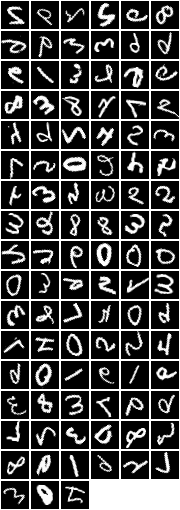

In [4]:
im = train_data[{ {2,100}, {}, {}, {}}]
itorch.image(im)

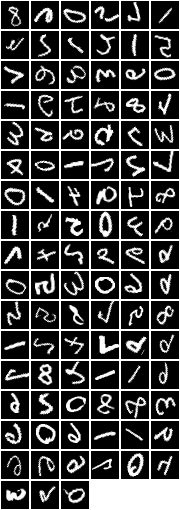

In [5]:
im = test_data[{ {2,100}, {}, {}, {}}]
itorch.image(im)